In [1]:
import os
import pandas as pd,numpy as np

In [3]:
df=pd.read_csv('NSSO68.csv',encoding='Latin-1',low_memory=False)

In [4]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [5]:
UP=df[df['state_1']=='UP']

In [6]:
UP.isnull().sum().sort_values(ascending=False)

soyabean_v             9015
soyabean_q             9015
Meals_School           8918
Meals_Employer         8886
Otherwise_possessed    8829
                       ... 
carrot_q                  0
radish_q                  0
brinjal_q                 0
tamato_q                  0
fv_tot                    0
Length: 384, dtype: int64

In [7]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [11]:
UP_new=UP[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [12]:
UP_new.isnull().sum().sort_values(ascending=False)

Meals_At_Home       60
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [14]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [15]:
UP_new.isnull().sum().sort_values(ascending=False)

Meals_At_Home       60
state_1              0
District             0
Sector               0
Region               0
State_Region         0
ricetotal_q          0
wheattotal_q         0
moong_q              0
Milktotal_q          0
chicken_q            0
bread_q              0
foodtotal_q          0
Beveragestotal_v     0
dtype: int64

In [16]:
UP_clean=UP_new.copy()

In [17]:
UP_clean.loc[:,'Meals_At_Home']=UP_clean['Meals_At_Home'].fillna(UP_new['Meals_At_Home'].mean())

In [18]:
UP_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [19]:
#Checking for outliers

In [20]:
import matplotlib.pyplot as plt

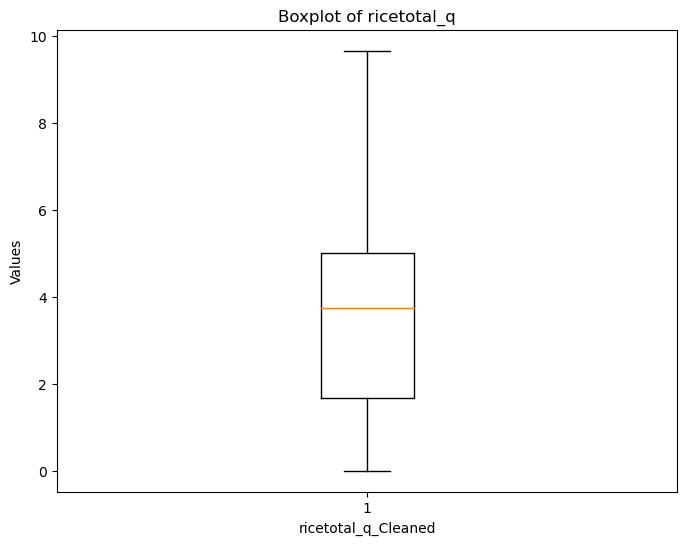

In [49]:
#Assuming UP_clean is the original data frame
plt.figure(figsize=(8, 6))
plt.boxplot(UP_clean['ricetotal_q'])
plt.xlabel('ricetotal_q_Cleaned')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [22]:
rice1 = UP_clean['ricetotal_q'].quantile(0.25)
rice2 = UP_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [23]:
UP_clean=UP_new[(UP_new['ricetotal_q']<=up_limit)&(UP_new['ricetotal_q']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x14a8e76f490>,
 'caps': [<matplotlib.lines.Line2D at 0x14a8e758f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x14a8e76d0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x14a8e75ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x14a8e75a610>],
 'means': []}

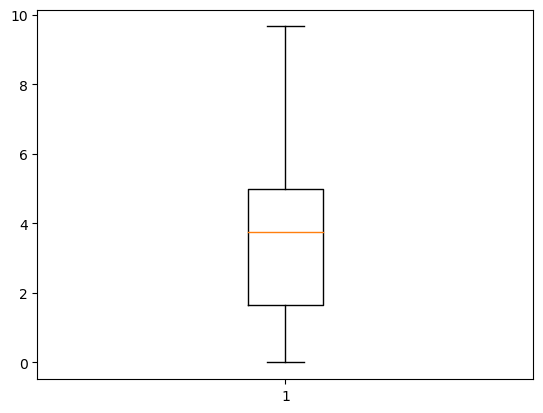

In [24]:
plt.boxplot(UP_clean['ricetotal_q'])

In [25]:
UP_clean['District'].unique()

array([58, 49, 54, 57, 48, 56, 55, 47, 45, 16, 13, 14, 12, 15, 17, 11, 31,
       32, 30,  7, 29, 43, 18, 44, 70, 71, 69, 67, 68, 10,  8,  9, 65, 60,
       61, 64, 59, 63, 62, 66,  6,  3,  5,  2,  4, 19,  1, 25, 20, 21, 24,
       23, 22, 34, 27, 50, 51, 46, 53, 52, 42, 41, 39, 35, 36, 38, 37, 33,
       40, 28, 26], dtype=int64)

In [26]:
#Replacing the values in the sector column
UP_clean.loc[:,'Sector'] = UP_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#Total consumption

In [28]:
UP_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [29]:
UP_clean.loc[:, 'total_consumption'] = UP_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

C:\Users\SAMPREETH\AppData\Local\Temp\ipykernel_14552\3760005685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UP_clean.loc[:, 'total_consumption'] = UP_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)


In [30]:
UP_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
29288,UP,58,RURAL,3,93,4.166667,5.833333,0.0,0,0.00,0.0,32.050250,40.0,60.0,82.050250
29289,UP,58,RURAL,3,93,5.000000,5.000000,0.0,0,0.00,0.0,26.025586,2.5,60.0,38.525586
29290,UP,58,RURAL,3,93,6.000000,6.300000,0.0,0,0.20,0.0,26.520300,2.5,60.0,41.520300
29291,UP,58,RURAL,3,93,5.000000,5.000000,0.0,0,0.00,0.0,35.050260,0.0,60.0,45.050260
29292,UP,58,RURAL,3,93,6.250000,6.500000,0.0,0,0.25,0.0,22.508600,12.5,60.0,48.008600


In [31]:
UP_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                     std       mean         max        min
Region                                                    
1              48.948429  64.005553  763.534133   8.528623
2              40.339907  58.247973  577.610855   0.000000
3              33.461687  54.748920  624.476260   0.000000
4              28.139560  55.263683  390.124275  20.214350
5              33.311343  58.405276  469.000270   0.000000

In [32]:
UP_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                53.101572  59.745148  452.700700  12.758392
2                72.080383  66.266380  763.534133  20.025180
3                31.150837  54.514776  189.350433   8.820000
4                40.163032  63.846222  345.250900  16.800064
5                21.263329  51.610992  154.401493  20.114368
...                    ...        ...         ...        ...
67               49.668258  66.810870  478.310828   0.000000
68               28.793158  51.623332  216.003202  21.500155
69               33.565965  61.787251  216.780500  24.194614
70               30.641669  64.679957  216.186520  26.583567
71               32.155748  60.432375  188.250850  20.575228

[71 rows x 4 columns]

In [34]:
total_consumption_by_districtcode=UP_clean.groupby('District')['total_consumption'].sum()

In [35]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
34    12832.685729
67    12760.876146
2     12656.878519
Name: total_consumption, dtype: float64

In [36]:
UP_clean.loc[:,"District"] = UP_clean.loc[:,"District"].replace({34: "Kanpur Nagar", 67: "Varanasi", 2: "Muzaffarnagar"})

In [38]:
total_consumption_by_districtname=UP_clean.groupby('District')['total_consumption'].sum()

In [39]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Kanpur Nagar     12832.685729
Varanasi         12760.876146
Muzaffarnagar    12656.878519
Name: total_consumption, dtype: float64

In [40]:
from statsmodels.stats import weightstats as stests

In [41]:
rural=UP_clean[UP_clean['Sector']=="RURAL"]
urban=UP_clean[UP_clean['Sector']=="URBAN"]

In [42]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
29288,UP,58,RURAL,3,93,4.166667,5.833333,0.0,0,0.00,0.0,32.050250,40.0,60.0,82.050250
29289,UP,58,RURAL,3,93,5.000000,5.000000,0.0,0,0.00,0.0,26.025586,2.5,60.0,38.525586
29290,UP,58,RURAL,3,93,6.000000,6.300000,0.0,0,0.20,0.0,26.520300,2.5,60.0,41.520300
29291,UP,58,RURAL,3,93,5.000000,5.000000,0.0,0,0.00,0.0,35.050260,0.0,60.0,45.050260
29292,UP,58,RURAL,3,93,6.250000,6.500000,0.0,0,0.25,0.0,22.508600,12.5,60.0,48.008600


In [43]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
68730,UP,50,URBAN,3,93,5.777778,6.222222,0.0,0,0.0,0.0,33.311300,4.444444,60.0,49.755744
68731,UP,50,URBAN,3,93,4.833333,5.166667,0.0,0,0.0,0.0,15.636825,4.166667,60.0,29.803492
68732,UP,50,URBAN,3,93,4.285714,5.000000,0.0,0,0.0,0.0,17.514511,2.857143,60.0,29.657368
68733,UP,50,URBAN,3,93,3.750000,7.500000,0.0,0,0.0,0.0,26.450263,6.250000,60.0,43.950263
68734,UP,50,URBAN,3,93,6.000000,7.500000,0.0,0,0.0,0.0,28.625538,12.500000,60.0,54.625538


In [46]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [47]:
#Performing the z test
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)

In [48]:
#Printing the z-score and the p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 15.349380604793554
P-Value: 3.5758420317152064e-53
